<a href="https://colab.research.google.com/github/PIYAL-DATTA/Usability-Evaluation/blob/main/Copy_of_Usability_Evaluation_of_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("waqi786/e-commerce-clickstream-and-transaction-dataset")

print("Path to dataset files:", path)
data_path = os.path.join(path, "ecommerce_clickstream_transactions.csv")


Path to dataset files: /kaggle/input/e-commerce-clickstream-and-transaction-dataset


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB


### Checking EventType column since to find out what events are present in the dataset and their value counts

In [ ]:
df['EventType'].value_counts()

,count
EventType,
page_view,10819
add_to_cart,10735
product_view,10696
logout,10685
purchase,10682
click,10632
login,10568


In [ ]:
df.head(5)

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


## Groupby user id and eventtype column of original dataset to make each event type as column for per user

In [ ]:
event_counts_user = df.groupby(['UserID','EventType']).size().unstack(fill_value=0).reset_index()

# Count unique sessions per user
session_counts = df.groupby('UserID')['SessionID'].nunique().reset_index(name='TotalSessions')

# Merge with your event_counts_user dataframe
event_counts_user = event_counts_user.merge(session_counts, on='UserID')


event_counts_user

,UserID,add_to_cart,click,login,logout,page_view,product_view,purchase,TotalSessions
0,1,23,5,11,6,15,14,8,10
1,2,18,10,9,9,10,4,13,10
2,3,11,10,5,13,9,10,6,10
3,4,14,9,13,12,17,9,9,10
4,5,13,15,8,13,14,14,7,10
...,...,...,...,...,...,...,...,...,...
995,996,10,12,8,9,12,12,12,10
996,997,7,12,12,11,14,15,7,10
997,998,13,10,5,10,11,17,6,10
998,999,9,11,13,11,10,9,12,10


In [ ]:
event_counts_user['Total'] = event_counts_user[['add_to_cart', 'click', 'login', 'logout', 'page_view', 'product_view', 'purchase']].sum(axis=1)

In [ ]:
event_counts_user

,UserID,add_to_cart,click,login,logout,page_view,product_view,purchase,TotalSessions,Total
0,1,23,5,11,6,15,14,8,10,82
1,2,18,10,9,9,10,4,13,10,73
2,3,11,10,5,13,9,10,6,10,64
3,4,14,9,13,12,17,9,9,10,83
4,5,13,15,8,13,14,14,7,10,84
...,...,...,...,...,...,...,...,...,...,...
995,996,10,12,8,9,12,12,12,10,75
996,997,7,12,12,11,14,15,7,10,78
997,998,13,10,5,10,11,17,6,10,72
998,999,9,11,13,11,10,9,12,10,75


In [ ]:
print("Maximum Total:", event_counts_user['Total'].max())
print("Minimum Total:", event_counts_user['Total'].min())

Maximum Total: 94
Minimum Total: 58


In [ ]:
# ===============>
print("Maximum purchase:", event_counts_user['purchase'].max())
print("Minimum purchase:", event_counts_user['purchase'].min())
# ===============>

Maximum purchase: 22
Minimum purchase: 3


In [ ]:
def cal_min_max(col):
  print(f"{col} Min: {event_counts_user[col].min()}")
  print(f"{col} Max: {event_counts_user[col].max()}")

## Calculating Min,Max of each event type for better understanding of data range

In [ ]:
col1 = ['add_to_cart','click','login','logout','page_view','product_view']
for x in col1:
    if x in event_counts_user.columns:
        cal_min_max(x)

add_to_cart Min: 2
add_to_cart Max: 23
click Min: 3
click Max: 23
login Min: 1
login Max: 19
logout Min: 2
logout Max: 22
page_view Min: 3
page_view Max: 24
product_view Min: 2
product_view Max: 22


### Since, we are using simulated dataset of ecommerce, we can not calculate System Usability Score Directly. Hence we are creating a function to calculate eventtype count for per user on the refined dataset. This will give us simulated_sus_score column.

In [ ]:
# ---------------------------OLD FUNCTION--------------------------- NEW WORKING FUNCTION BELOW! --------------------------------------
# def simulate_user_sus(row):
#     score = 65  # neutral baseline

#     # ✅ Task success
#     if row['purchase'] > 0:
#         score += 10
#     elif row['purchase'] == 0:
#         score -= 10

#     # ✅ Positive engagement
#     if row['add_to_cart'] >= 15:
#         score += 5
#     elif row['add_to_cart'] < 15 and row['add_to_cart'] >=10:
#         score += 2
#     elif row['add_to_cart'] < 10 and row['add_to_cart'] >=5:
#         score -= 2
#     elif row['add_to_cart'] < 5:
#         score -= 5

#     # ⚠️ Too many clicks might indicate confusion
#     if row['click'] >= 18:
#         score -= 3  # high click
#     elif row['click'] < 18 and row['click'] >= 12:
#         score -= 2  # close to high click
#     elif row['click'] < 12 and row['click'] >= 7:
#         score += 2 # moderate clicking so plus 2
#     elif row['click'] < 7:
#         score += 3  # maybe the task was quick and easy

#     # 📦 Product viewing pattern
#     if row['product_view'] >= 18:
#         score -= 5
#     elif row['product_view'] < 18 and row['product_view'] >= 12:
#         score -= 2
#     elif row['product_view'] < 12 and row['product_view'] >= 7:
#         score += 2
#     elif row['product_view'] < 7:
#         score += 5

#     # 👀 Page depth
#     if row['page_view'] >= 20:
#         score -= 3
#     elif row['page_view'] < 20 and row['page_view'] >= 15:
#         score -= 1
#     elif row['page_view'] < 15 and row['page_view'] >= 10:
#         score += 1
#     elif row['page_view'] < 10 and row['page_view'] >= 5:
#         score += 2
#     elif row['page_view'] < 5:
#         score += 3

#     # 🚪 Logout behavior
#     if row['logout'] == 0:
#         score -= 5
#     elif row['logout'] > 0 and row['logout'] <= 5:
#         score -= 3
#     elif row['logout'] > 5 and row['logout'] <= 10:
#         score += 1
#     elif row['logout'] > 10 and row['logout'] <= 15:
#         score += 3
#     elif row['logout'] > 15:
#         score += 5

#     # 👤 Login reliability
#     if row['login'] > 15:
#         score -= 3  # maybe logging in too often = issue
#     elif row['login'] > 10 and row['login'] <= 15:
#         score -= 1
#     elif row['login'] > 5 and row['login'] <= 10:
#         score += 2
#     elif row['login'] > 0 and row['login'] <= 5:
#         score += 3

#     return max(0, min(100, score))

In [ ]:
# Piyal ==================>
columns = ['add_to_cart', 'click', 'login', 'logout', 'page_view', 'product_view', 'purchase', 'TotalSessions']

for col in columns:
    min_val = event_counts_user[col].min()
    max_val = event_counts_user[col].max()
    difference = max_val - min_val
    quater = difference / 4
    quater = round(quater)
    calc_mean = (min_val + max_val) / 2
    actual_mean = event_counts_user[col].mean()

    print(f"Minimum: {min_val} Maximum: {max_val} Difference: {difference} 4-Part: {quater} Calculated Mean: {calc_mean} Mean: {actual_mean} ==> {col}")


Minimum: 2 Maximum: 23 Difference: 21 4-Part: 5 Calculated Mean: 12.5 Mean: 10.735 ==> add_to_cart
Minimum: 3 Maximum: 23 Difference: 20 4-Part: 5 Calculated Mean: 13.0 Mean: 10.632 ==> click
Minimum: 1 Maximum: 19 Difference: 18 4-Part: 4 Calculated Mean: 10.0 Mean: 10.568 ==> login
Minimum: 2 Maximum: 22 Difference: 20 4-Part: 5 Calculated Mean: 12.0 Mean: 10.685 ==> logout
Minimum: 3 Maximum: 24 Difference: 21 4-Part: 5 Calculated Mean: 13.5 Mean: 10.819 ==> page_view
Minimum: 2 Maximum: 22 Difference: 20 4-Part: 5 Calculated Mean: 12.0 Mean: 10.696 ==> product_view
Minimum: 3 Maximum: 22 Difference: 19 4-Part: 5 Calculated Mean: 12.5 Mean: 10.682 ==> purchase
Minimum: 10 Maximum: 10 Difference: 0 4-Part: 0 Calculated Mean: 10.0 Mean: 10.0 ==> TotalSessions


In [ ]:
# ADJUSTED WITH REAL SUS SCORING
def simulate_user_sus(row):
    score = 50  # neutral baseline (0-100 scale)
    max_score = 100 # SUS Scale Max Score
    # Sessions represent How many time a user returned to that site
    # purchase > Sessions means, considering user have bought things everyone HE/SHE visited the site.
        # if row['purchase'] >= ((event_counts_user['purchase'].max()-event_counts_user['purchase'].min())/2):
    #     score += 9
    # elif row['purchase'] > 0:
    #     score += 4.5
    # else:
    #     score -= 9

    # if row['purchase'] > 0:
    #     score += 9
    # else:
    #     score -= 9

    # ✅ Task success
    if row['purchase'] > event_counts_user['TotalSessions'].max():
        score += 22.5
    elif row['purchase'] > 0:
        score += 11.25
    else:
        score -= 22.5

    # ✅ Positive engagement ADD-TO-CART
    if row['add_to_cart'] >= (event_counts_user['add_to_cart'].max()-5):
        score += 5
    elif row['add_to_cart'] >= (event_counts_user['add_to_cart'].max()-(5*2)):
        score += 2.5
    elif row['add_to_cart'] >= (event_counts_user['add_to_cart'].max()-(5*3)):
        score -= 2.5
    else:
        score -= 5

    # ⚠️ Too many clicks might indicate confusion
    if row['click'] >= (event_counts_user['click'].max()-5):
        score -= 5
    elif row['click'] >= (event_counts_user['click'].max()-(5*2)):
        score -= 2.5
    elif row['click'] >= (event_counts_user['click'].max()-(5*3)):
        score += 2.5
    else:
        score += 5

    # 📦 Product viewing pattern
    if row['product_view'] >= (event_counts_user['product_view'].max()-5):
        score -= 5
    elif row['product_view'] >= (event_counts_user['product_view'].max()-(5*2)):
        score -= 2.5
    elif row['product_view'] >= (event_counts_user['product_view'].max()-(5*3)):
        score += 2.5
    else:
        score += 5

    # 👀 Page depth
    if row['page_view'] >= (event_counts_user['page_view'].max()-5):
        score -= 5
    elif row['page_view'] >= (event_counts_user['page_view'].max()-(5*2)):
        score -= 2.5
    elif row['page_view'] >= (event_counts_user['page_view'].max()-(5*3)):
        score += 2.5
    else:
        score += 5

    # 🚪 Logout behavior
    if row['logout'] >= (event_counts_user['logout'].max()-5):
        score += 5
    elif row['logout'] >= (event_counts_user['logout'].max()-(5*2)):
        score += 2.5
    elif row['logout'] >= (event_counts_user['logout'].max()-(5*3)):
        score -= 2.5
    else:
        score -= 5

    # 👤 Login reliability
    if row['login'] >= (event_counts_user['login'].max()-5):
        score -= 2.5
    elif row['login'] >= (event_counts_user['login'].max()-(5*2)):
        score -= 1.25
    elif row['login'] >= (event_counts_user['login'].max()-(5*3)):
        score += 1.25
    else:
        score += 2.5

    # Clipping within raw SUS range
    return max(0, min(max_score, score))

## multiplying by 2.5 because SUS score is ranged 0-100 after questionnaire

In [ ]:
event_counts_user['simulated_sus_score'] = event_counts_user.apply(simulate_user_sus, axis=1)
# event_counts_user['simulated_sus_score'] *= 2.5 #Scaling to 100

In [ ]:
def simulate_sus_grade(row):
  grade = np.nan

  if row['simulated_sus_score'] >= 84.1 and row['simulated_sus_score'] <= 100.0:
    grade = 'A+'
  elif row['simulated_sus_score'] >= 80.8 and row['simulated_sus_score'] <= 84.0:
    grade = 'A'
  elif row['simulated_sus_score'] >= 78.9 and row['simulated_sus_score'] <= 80.7:
    grade = 'A-'
  elif row['simulated_sus_score'] >= 77.2 and row['simulated_sus_score'] <= 78.8:
    grade = 'B+'
  elif row['simulated_sus_score'] >= 74.1 and row['simulated_sus_score'] <= 77.1:
    grade = 'B'
  elif row['simulated_sus_score'] >= 72.6 and row['simulated_sus_score'] <= 74.0:
    grade = 'B-'
  elif row['simulated_sus_score'] >= 71.1 and row['simulated_sus_score'] <= 72.5:
    grade = 'C+'
  elif row['simulated_sus_score'] >= 65.0 and row['simulated_sus_score'] <= 71.0:
    grade = 'C'
  elif 62.7 <= row['simulated_sus_score'] <= 64.9:
    grade = 'C-'
  elif 51.7 <= row['simulated_sus_score'] <= 62.6:
    grade = 'D'
  else:
    grade = 'F'

  return grade

In [ ]:
event_counts_user['sus_grade'] = event_counts_user.apply(simulate_sus_grade, axis=1)

In [ ]:
event_counts_user['simulated_sus_score'].describe()

,simulated_sus_score
count,1000.000000
mean,67.955000
std,8.777351
min,42.500000
25%,62.500000
50%,67.500000
75%,73.750000
max,93.750000


In [ ]:
event_counts_user.iloc[140:150]

,UserID,add_to_cart,click,login,logout,page_view,product_view,purchase,TotalSessions,Total,simulated_sus_score,sus_grade
140,141,8,12,9,10,13,9,10,10,71,62.50,D
141,142,12,15,6,12,10,8,10,10,73,65.00,C
142,143,11,8,14,15,11,8,8,10,75,66.25,C
143,144,12,8,12,13,13,12,10,10,80,62.50,D
144,145,6,15,9,14,13,8,8,10,73,60.00,D
145,146,11,8,17,6,11,7,11,10,71,70.00,C
146,147,4,12,11,9,15,12,13,10,76,61.25,D
147,148,7,15,9,10,9,10,13,10,73,66.25,C
148,149,10,5,11,12,18,7,9,10,72,65.00,C
149,150,8,15,9,10,8,5,14,10,69,73.75,B-


In [ ]:
grade_counts = event_counts_user['sus_grade'].value_counts()
print(grade_counts)

sus_grade
D     283
C     271
C+     95
B      89
A      66
B+     58
B-     56
F      33
C-     21
A+     18
A-     10
Name: count, dtype: int64


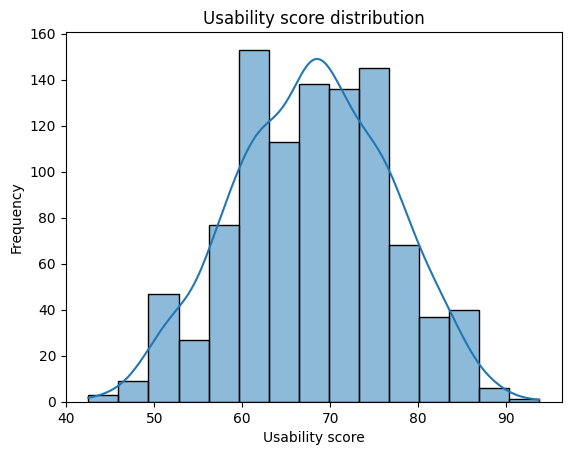

In [ ]:
sns.histplot(event_counts_user['simulated_sus_score'],bins=15,kde=True,palette='coolwarm')
plt.title("Usability score distribution")
plt.xlabel('Usability score')
plt.ylabel('Frequency')
plt.show()

## So, This is a Normal or Gaussian Distribution

## Now, We will try to understand the correlation between features by using correlation matrix

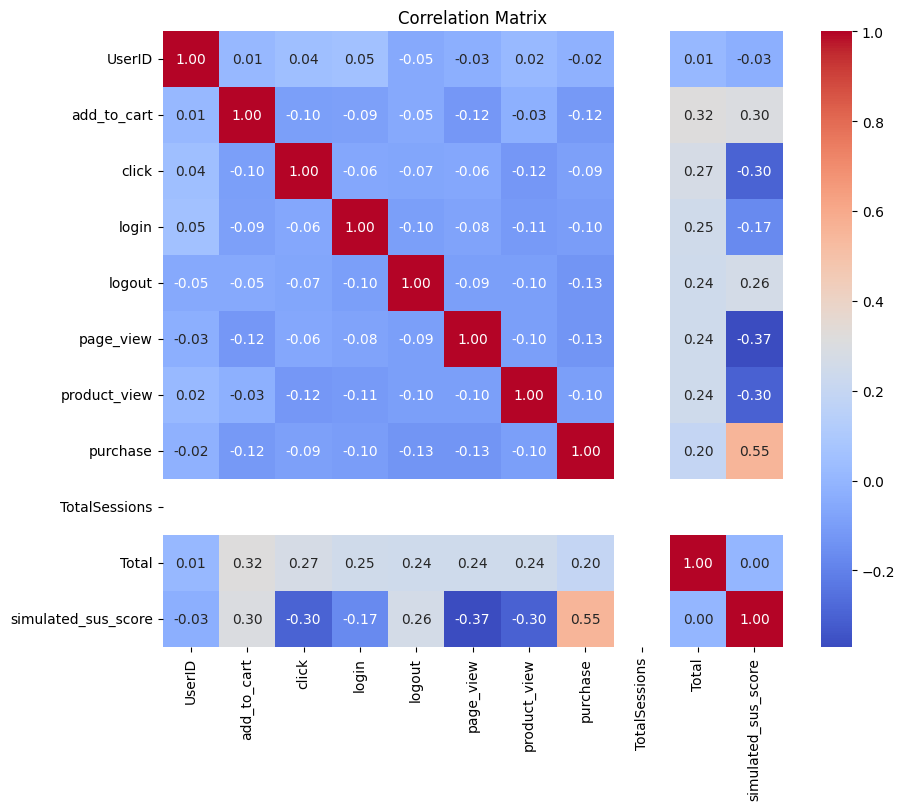

In [ ]:
corr = event_counts_user.drop(columns=['sus_grade']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Checking null values

In [ ]:
event_counts_user.isnull().sum()
event_counts_user.dropna(inplace=True)

In [ ]:
list1 = [i for i in range(0,1001,1)]
list1

for i in list1:
  if i not in event_counts_user['UserID'].unique():
    print(i)

0


In [ ]:
event_counts_user.to_csv('simulated_usability_evaluation_ecommerce.csv',index=False)

## Train-test split

## We will use this refined dataset to train our model.

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
result = []

X = event_counts_user.drop(columns=['UserID','simulated_sus_score','sus_grade'])
y = event_counts_user['simulated_sus_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"R-squared:{r2:.2f}")
print(f"Mean absolute Error:{mae:.2f}")
print(f"Mean absolute percentage Error:{mape:.2f}%")

result.append(['Linear Regression',r2])

Mean Squared Error:19.87
R-squared:0.77
Mean absolute Error:3.71
Mean absolute percentage Error:0.06%


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"R-squared:{r2:.2f}")
print(f"Mean absolute Error:{mae:.2f}")
print(f"Mean absolute percentage Error:{mape:.2f}%")

result.append(['Random Forest',r2])

Mean Squared Error:4.99
R-squared:0.94
Mean absolute Error:1.67
Mean absolute percentage Error:0.03%


In [ ]:
print(X_test.head())
y_test.head()

     add_to_cart  click  login  logout  page_view  product_view  purchase  \
918           11      8     12      12         13            11        19   
16            14     12      1       9         10            16        13   
526           14      8      9      12         10            12         8   
710           17      8      9      12          6            13         8   
740           11     13     12      12         13            12         6   

     TotalSessions  Total  
918             10     86  
16              10     75  
526             10     73  
710             10     73  
740             10     79  


,simulated_sus_score
918,78.75
16,77.50
526,67.50
710,70.00
740,57.50


In [ ]:
sample1 = X_test.iloc[0:5]
prediction = rf.predict(sample1)
prediction

array([78.2875, 75.9   , 72.65  , 73.425 , 57.5125])

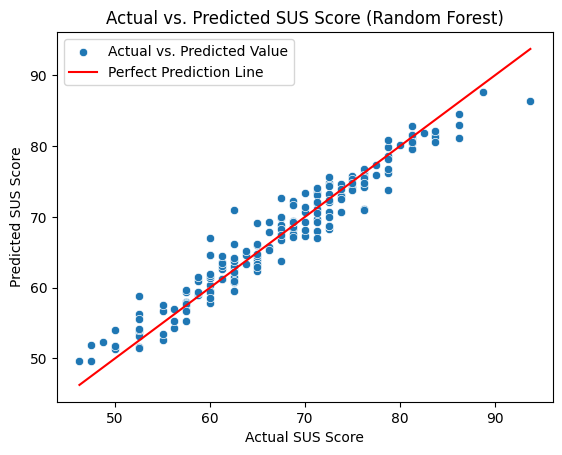

In [ ]:
sns.scatterplot(x=y_test, y=y_pred,label='Actual vs. Predicted Value')
# Perfect prediction line (y = x)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r', label='Perfect Prediction Line')
plt.xlabel('Actual SUS Score')
plt.ylabel('Predicted SUS Score')
plt.title('Actual vs. Predicted SUS Score (Random Forest)')
plt.legend()
plt.savefig('actual_vs_predicted_rf.png')
plt.show()

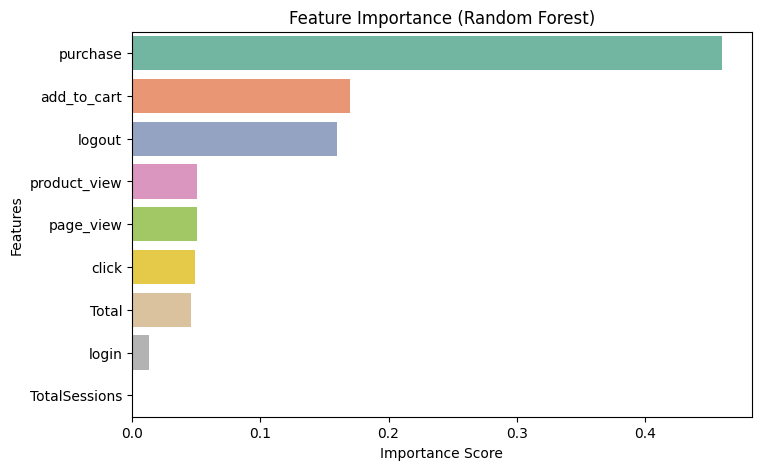

In [ ]:
importances = pd.Series(rf.feature_importances_,index=X.columns)
importances.sort_values(ascending=False,inplace=True)
importances.index

plt.figure(figsize=(8, 5))
sns.barplot(x=importances,y=importances.index,palette='Set2')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.savefig('feature_importance.png')
plt.show()

In [ ]:
importances

,0
purchase,0.460152
add_to_cart,0.169804
logout,0.159646
product_view,0.051082
page_view,0.050622
click,0.049429
Total,0.045780
login,0.013484
TotalSessions,0.000000


## XGBoost Model Training

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"R-squared:{r2:.2f}")
print(f"Mean absolute Error:{mae:.2f}")
print(f"Mean absolute percentage Error:{mape:.2f}%")

result.append(['XGBoost',r2])

Mean Squared Error:2.60
R-squared:0.97
Mean absolute Error:1.17
Mean absolute percentage Error:0.02%


In [ ]:
sample = X_test.iloc[0:5]
print(y_test.iloc[0:5])
prediction = xgb.predict(sample)
prediction

918    78.75
16     77.50
526    67.50
710    70.00
740    57.50
Name: simulated_sus_score, dtype: float64


array([77.51852 , 71.894196, 69.88969 , 73.260925, 58.518063],
      dtype=float32)

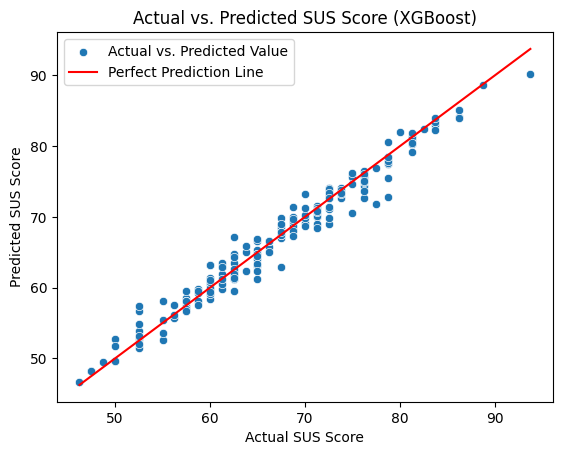

In [ ]:
sns.scatterplot(x=y_test, y=y_pred,label='Actual vs. Predicted Value')
# Perfect prediction line (y = x)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r', label='Perfect Prediction Line')
plt.xlabel('Actual SUS Score')
plt.ylabel('Predicted SUS Score')
plt.title('Actual vs. Predicted SUS Score (XGBoost)')
plt.legend()
plt.savefig('actual_vs_predicted_xgb.png')
plt.show()

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"R-squared:{r2:.2f}")
print(f"Mean absolute Error:{mae:.2f}")
print(f"Mean absolute percentage Error:{mape:.2f}%")

result.append(['Support Vector Regression',r2])

Mean Squared Error:51.55
R-squared:0.40
Mean absolute Error:5.86
Mean absolute percentage Error:0.09%


## KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"R-squared:{r2:.2f}")
print(f"Mean absolute Error:{mae:.2f}")
print(f"Mean absolute percentage Error:{mape:.2f}%")

result.append(['KNN',r2])

Mean Squared Error:29.75
R-squared:0.65
Mean absolute Error:4.18
Mean absolute percentage Error:0.06%


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(splitter='best')
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"R-squared:{r2:.2f}")
print(f"Mean absolute Error:{mae:.2f}")
print(f"Mean absolute percentage Error:{mape:.2f}%")

result.append(['Decision Tree',r2])

Mean Squared Error:9.23
R-squared:0.89
Mean absolute Error:2.14
Mean absolute percentage Error:0.03%


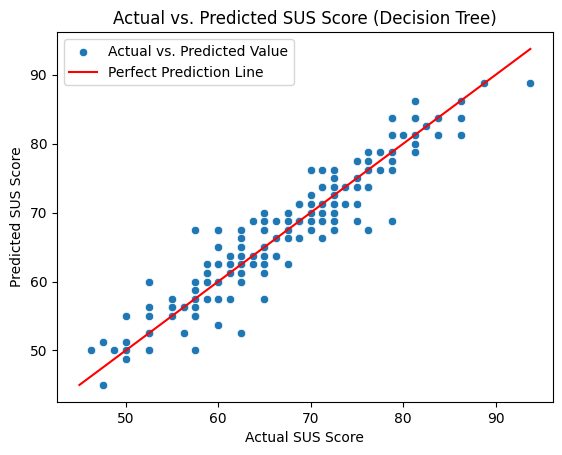

In [ ]:
sns.scatterplot(x=y_test, y=y_pred,label='Actual vs. Predicted Value')
# Perfect prediction line (y = x)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r', label='Perfect Prediction Line')
plt.xlabel('Actual SUS Score')
plt.ylabel('Predicted SUS Score')
plt.title('Actual vs. Predicted SUS Score (Decision Tree)')
plt.legend()
plt.savefig('actual_vs_predicted_dt.png')
plt.show()

In [ ]:
result

[['Linear Regression', 0.7674292159864332],
 ['Random Forest', 0.9416311327003148],
 ['XGBoost', 0.9696205935910632],
 ['Support Vector Regression', 0.39682926275186114],
 ['KNN', 0.6518419413096472],
 ['Decision Tree', 0.8919422466962165]]